# Basic options

The *cpd* function has several options at disposal. Some of them may improve performance, precision or give insights about the tensor at hand. If you look at the source code, the first line of **cpd** is the following:

    def cpd(T, r, options=False):

The first action of the function **cpd** is to read the parameter $\verb|options|$. When set to False, this function set the parameters to their default values. In order to change some of them the user needs to create the class $\verb|options|$ and add the parameters of interest with their corresponding values. The default class with all the default parameters is showed below:

    class options:
        maxiter = 200  
        tol = 1e-6
        tol_step = 1e-6
        tol_improv = 1e-6
        tol_grad = 1e-6
        method = 'dGN'
        inner_method = 'cg'
        cg_maxiter = 300
        cg_factor = 1
        cg_tol = 1e-6
        bi_method_parameters = ['als', 500, 1e-6] 
        initialization = 'random'
        trunc_dims = 0
        tol_mlsvd = 1e-16
        init_damp = 1
        refine = False
        symm = False
        constraints = [0, 0, 0]
        factors_norm = 0
        trials = 10
        display = 0
        epochs = 1

There are a lot of options, but don't worry, I will explain them one by one now. If you don't want to bother learning the details, be assured that all default values were obtained after a long and exhausting marathon of tests, with lots of different tensors. Of course we can't say these values will apply to any possible tensor, but you can learn more about these options as the necessity arises. The thing is, tensors are hard, very hard. Just there isn't a single algorithm which works for all of them, and very often you will need to make experimentation with the parameters in order to find the right combination for one specific tensor. In my experience, having several options to combine and tune works better than just having a few options like tolerance and number of iterations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tfx

# Display

There are four choices for the $\verb|display|$ option: $-2,-1,0,1,2,3,4$. These options controls what the user can see during the computations (works as the *verbose* parameter, but I prefer the name $\verb|display|$). In the previous lesson we let the defaults and there were no output whatsoever (because the display default is $0$).

 - $\verb|display|$ $=0$ (default): show nothing on the screen.

 - $\verb|display|$ $=1$: shows useful information about the principal stages of the computation. 
    
 - $\verb|display|$ $=2$: shows everything the option $\verb|display|$ $=1$ shows plus information about each iteration.
    
 - $\verb|display|$ $=3$ is special, it shows eveything the option $\verb|display|$ $=2$ shows and also shows the relative error of the compressed tensor (the computation of this error is costly so avoid that for big tensors).
    
 - $\verb|display|$ $=4$ is almost equal to $\verb|display|$ $=3$ but now there are more digits displayed on the screen ($\verb|display|$ $=3$ is a "clean" version of $\verb|displa|y$ $=4$, with less information). 
    
 - $\verb|display|$ $=-1$ is a special option for it is reserved for tensors of order higher than $3$. 
 
 - $\verb|display|$ $=-2$ shows everything the option $\verb|display|$ $=-1$ shows plus the error of the compressed tensor (very costly) and the errors of the tensor train approximation before and after the CPD.
    
The options $-1$ and $-2$ will be discussed in the lesson of advanced options. Now let's start creating our toy model tensor.

In [2]:
# Create tensor.
m = 2
T = np.zeros((m, m, m))
s = 0

for k in range(m):
    for i in range(m):
        for j in range(m):
            T[i,j,k] = s
            s += 1

In [3]:
# Create class of options with display=1.
class options:
    display = 1

# Compute the CPD of T with partial display.
R = 3
factors, T_approx, output = tfx.cpd(T, R, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 48
    Relative error = 1.3168379366319825e-05
    Accuracy =  99.99868 %


In [4]:
# Compute the CPD of T with full display.
options.display = 2
factors, T_approx, output = tfx.cpd(T, R, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD
    Iteration | Rel error |  Step size  | Improvement | norm(grad) | Predicted error | # Inner iterations
        1     | 9.75e-01  |  2.06e+00   |  9.75e-01   |  3.33e+01  |    2.69e-01     |        2        
        2     | 8.63e-01  |  2.14e+00   |  1.12e-01   |  7.92e+00  |    1.95e-01     |        3        
        3     | 3.62e-01  |  3.08e+00   |  5.01e-01   |  1.19e+01  |    1.60e+00     |        3        
        4     | 1.08e-01  |  8.11e-01   |  2.54e-01   |  1.19e+01  |    2.37e-01     |        3        
        5     | 6.36e-02  |  2.27e-01   |  4.45e-02   |  3.13e+

In [5]:
# Compute the CPD of T with full display plus relative error of compression.
options.display = 3
factors, T_approx, output = tfx.cpd(T, R, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
    Compression relative error = 1.994874e-16
-----------------------------------------------------------------------------------------------
Type of initialization: random
    Initial guess relative error = 9.365165e-01
-----------------------------------------------------------------------------------------------
Computing CPD
    Iteration | Rel error |  Step size  | Improvement | norm(grad) | Predicted error | # Inner iterations
        1     | 5.78e-01  |  1.89e+00   |  5.78e-01   |  1.16e+01  |    5.68e-01     |        2        
        2     | 2.86e-01  |  8.21e-01   |  2.92e-01   |  1.28e+01  |    2.36e-03     |        3        
        3     | 2.02e-01  |  2.54e-01   |  8.42e-02   |  6.36e+00  |    2.89e-04     |        3        
        4     | 1.39e-01  |  2.75e-01   |  6.29e-02   |  4.61e+00  |    4

The difference between display $2$ and $3$ is only the initial guess relative error, which is given when $\verb|display|$ $=3$. This is the error $\|T - T_{approx}^{(0)}\| / \|T\|$, where $T_{approx}^{(0)}$ is the starting point of the iterations. Sometimes it can be useful to know if the starting point is too far away or not from the objective tensor. Since the computation of this error is very costly, I've made this as an extra option. 

Let $(X^{(k)}, Y^{(k)}, Z^{(k)})$ be the approximated factor matrices at the $k$-th iteration and define the error function 
$$F(w^{(k)}) = \frac{1}{2} \| T - T^{(k)}_{approx} \|^2,$$ 
where $w^{(k)} = vec( vec(X^{(k)}), vec(Y^{(k)}), vec(Z^{(k)}) )$ is the vectorization of $(X^{(k)}, Y^{(k)}, Z^{(k)})$ and $T_{approx}^{(k)} = T^{(k)}_{approx}(X, Y, Z)$ is its corresponding coordinate tensor. Below there are the description of each output column.

 - **Iteration**: it just the numbering of the iterations.
 
 - **Rel error**: the relative error between the current approximation and the objective tensor, i.e., the value
 
 $$ \frac{\| T - T_{approx}^{(k)} \|}{\| T \|},$$
 where $k$ is the numbering of the current iteration.
 
 - **Step size**: the distance between two consecutives CPDs, i.e., it is the value 
 
 $$ \| w^{(k-1)} - w^{(k)} \|.$$

 
 - **Improvement**: the difference (in absolute value) between two consecutive errors, i.e., the value
 
 $$\left| \frac{\| T - T_{approx}^{(k-1)} \|}{\| T \|} - \frac{\| T - T_{approx}^{(k)} \|}{\| T \|} \right|.$$ 

 - **norm(grad)**: the original problem can be regarded as a nonlinear least squares problem, and a minimizer is also a critical point, so it is of interest to keep track of the infinite norm of the gradient (the value $\| \nabla F(w^{(k)}) \|_\infty$) to check if it is approaching zero. 
 
 - **Predicted error**: each iteration tries to minimize a linear model of the original problem. After we compute such a minimizer we have a error of this model which is expected to be close to the original one. In this case we are keeping track of the absolute error. This error is important for updating the damping parameter. For more about this linear model check the section about the damping parameter in the next lesson.
 
 - **# Inner iterations**: the linear model mentioned above is solved by the [conjugate gradient](https://en.wikipedia.org/wiki/Conjugate_gradient_method) method. There are parameters to control the error tolerance and number of iterations of this method. We talk more about this at the *advanced options* lesson.

# Maximum number of iterations and tolerance

As the names suggest, $\verb|maxiter|$ is the maximum number of iterations permitted, whereas $\verb|tol|$ is the tolerance parameter, which is used to make stopping criteria. Both values are related in the sense we should increase *maxiter* when we decrease $\verb|tol|$. One can note that this is not the only tolerance parameter. All parameters $\verb|tol|, \ \verb|tol|\_\verb|step|, \ \verb|tol|\_\verb|improv|, \ \verb|tol|\_\verb|grad|$ are used at each iteration as stopping conditions. The program stops if 

$1) \hspace{1cm} \displaystyle \frac{\| T - T_{approx}^{(k)} \|}{\| T \|} <  \verb|tol| \hspace{6.6cm} (\text{relative error})$

$2) \hspace{1cm} \displaystyle \| w^{k} - w^{k-1}\| < \verb|tol|\_\verb|step| \hspace{5.6cm} (\text{step size})$

$3) \hspace{1cm} \displaystyle \left| \frac{\| T - T_{approx}^{(k)} \|}{\| T \|} - \frac{\| T - T_{approx}^{(k-1)} \|}{\| T \|} \right| <  \verb|tol|\_\verb|improv| \hspace{1.5cm} (\text{relative improvement})$

$4) \hspace{1cm} \displaystyle \| \nabla F(w^{(k)}) \|_\infty < \verb|tol|\_\verb|grad| \hspace{5.6cm}(\text{gradient norm})$ 

Now let's decrease all tolerances to $10^{-12}$ and see if we get better approximations for the CPD of this example. We keep the rest with default values.

In [6]:
# Compute the CPD of T with tol = 1e-12.
options.display = 1
options.tol = 1e-12
options.tol_step = 1e-12
options.tol_improv = 1e-12
options.tol_grad = 1e-12
factors, T_approx, output = tfx.cpd(T, R, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 200
    Relative error = 1.9943022066457984e-07
    Accuracy =  99.99998 %


To understad better how the tolerance influence the precision we can make a plot varying the tolerances. 

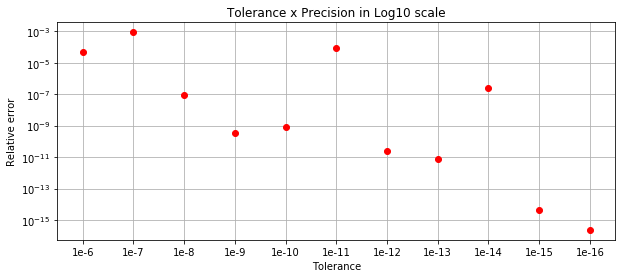

In [7]:
errors = []
options.display = 0
tolerances = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16]
tolerances_str = ['1e-6','1e-7','1e-8','1e-9','1e-10','1e-11','1e-12','1e-13','1e-14','1e-15','1e-16']

for tol in tolerances:
    options.maxiter = 500
    options.tol = tol
    options.tol_step = tol
    options.tol_improv = tol
    options.tol_grad = tol
    factors, T_approx, output = tfx.cpd(T, R, options)
    errors.append(output.rel_error)
    
plt.figure(figsize=[10,4])
plt.plot(tolerances_str, errors, 'ro')
plt.title('Tolerance x Precision in Log10 scale')
plt.xlabel('Tolerance')
plt.ylabel('Relative error')
plt.yscale('log')
plt.grid()
plt.show()